In [1]:
import numpy as np
import pandas as pd

In [2]:
def simple_exp_smooth(d, extra_periods, alpha=0.4):
    cols = len(d)
    d = np.append(d,[np.nan]*extra_periods)

    f = np.full(cols+extra_periods,np.nan)
    f[1] = d[0]

    for t in range(2,cols+1):
        f[t] = alpha*d[t-1]+(1-alpha)*f[t-1]

    for t in range(cols+1, cols+extra_periods):
        f[t] =f[t-1]

    df = pd.DataFrame.from_dict({'Demand':d,'Forecast':f,'Error':d-f})

    return df

In [3]:
d = [28,19,18,13,19,16,19,18,13,16,16,11,18,15,13,15,13,11,13,10,12]
df = simple_exp_smooth(d, extra_periods=4)

In [4]:
def kpi(df):
    dem_ave = df.loc[df['Error'].notnull(),'Demand'].mean()
    bias_abs = df['Error'].mean()
    bias_rel = bias_abs / dem_ave
    print('Bias: {:0.2f}, {:.2%}'.format(bias_abs,bias_rel))
    MAPE = (df['Error'].abs()/df['Demand']).mean()
    print('MAPE: {:.2%}'.format(MAPE))
    MAE_abs = df['Error'].abs().mean()
    MAE_rel = MAE_abs / dem_ave
    print('MAE: {:0.2f}, {:.2%}'.format(MAE_abs,MAE_rel))
    RMSE_abs = np.sqrt((df['Error']**2).mean())
    RMSE_rel = RMSE_abs / dem_ave
    print('RMSE: {:0.2f}, {:.2%}'.format(RMSE_abs,RMSE_rel))

In [5]:
kpi(df)

Bias: -2.02, -13.56%
MAPE: 19.25%
MAE: 2.74, 18.39%
RMSE: 3.89, 26.11%


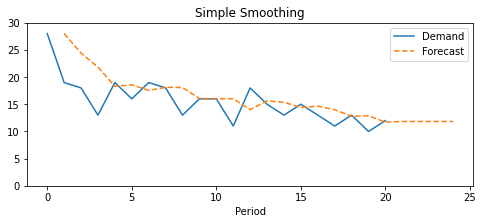

In [8]:
df.index.name = 'Period'
df[['Demand','Forecast']].plot(figsize=(8,3), title='Simple Smoothing', ylim=(0,30), style=['-','--']);